In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import linregress
from tabulate import tabulate
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
"""
USEFUL CODE:

1. TO FIND ERROR IN SLOPE: 

slope, intercept, r_value, p_value, std_err = linregress(x, y)
slope_error = std_err / np.sqrt(len(x))
print(f"Slope: {slope}")
print(f"Slope error: {slope_error}")

2. PLOTTING ERRORBARS

plt.errorbar(x,y, yerr= y_err, xerr= x_err, fmt='o', label = 'Data Point', markersize = 4)

3. CHANGING FIGURE SIZE

plt.figure(figsize=(7.5,5))

4. CURVE FIT

def function(R_th, a, b,c):
    return a +b*np.log(R_th) + c*((np.log(R_th)))**3

pars, cov = curve_fit(f=function, xdata= x, ydata= y) #, p0=[0, 0], bounds=(-np.inf, np.inf))

#stdevs = np.sqrt(np.diag(cov))
#res = y - steinhart(x, *pars)

(a,b, c) = [*pars]

plt.plot(x, function(R_th, a,b,c), label='Equation of curve: $'r' $')
print(a,b,c)

5. LATEX TABLES
a. ROWS

table_format = r"\begin{tabular}{|c|c|c|c|c|} \hline"

# Add the first row of the table with the elements of arr1
table_row1 = " & ".join([str(x) for x in X])
table_row1 = f"{table_row1} \\\\ \\hline"

# Add the second row of the table with the elements of arr2
table_row2 = " & ".join([str(x) for x in Y])
table_row2 = f"{table_row2} \\\\ \\hline"

# Combine the table format and rows into a complete LaTeX table
latex_table = f"{table_format}\n{table_row1}\n{table_row2}\n\\end{{tabular}}"

# Print the resulting LaTeX table
print(latex_table)


6. Gaussian function

# Define parameters for the Gaussian distribution
mu = 0
sigma = 1

d = np.array([])

# Evaluating the probability density function (PDF) of the Gaussian distribution at each point
y = stats.norm.pdf(d, mu, sigma)

# Plotting the Gaussian distribution
plt.scatter(d, y, s =4)
plt.plot(d,y, color='r')
plt.xlabel('Diameter of Central Maxima')
plt.ylabel('Normalised Gaussian Distribution')
plt.show()

7. Histogram

# Generate some random data with a Gaussian distribution
data = np.random.normal(loc=0, scale=1, size=10000)

# Create a histogram of the data
N, bins, patches = plt.hist(data, bins=100)

# Find the bin with the maximum frequency
bin_index = np.argmax(N)

# Find the bin edges and width
bin_edges = bins[bin_index:bin_index+2]
bin_width = bin_edges[1] - bin_edges[0]

# Compute the center of the bin with the maximum frequency
bin_center = bin_edges.mean()

# Print the center and frequency of the bin with the maximum frequency
print("Bin with maximum frequency: center={}, frequency={}".format(bin_center, N[bin_index]))

# Plot the histogram with the bin with maximum frequency highlighted
plt.bar(bin_center, N[bin_index], width=bin_width, color='r', alpha=0.5)
plt.show()



"""

'\nUSEFUL CODE:\n\n1. TO FIND ERROR IN SLOPE: \n\nslope, intercept, r_value, p_value, std_err = linregress(x, y)\nslope_error = std_err / np.sqrt(len(x))\nprint(f"Slope: {slope}")\nprint(f"Slope error: {slope_error}")\n\n2. PLOTTING ERRORBARS\n\nplt.errorbar(x,y, yerr= y_err, xerr= x_err, fmt=\'o\', label = \'Data Point\', markersize = 4)\n\n3. CHANGING FIGURE SIZE\n\nplt.figure(figsize=(7.5,5))\n\n4. CURVE FIT\n\ndef function(R_th, a, b,c):\n    return a +b*np.log(R_th) + c*((np.log(R_th)))**3\n\npars, cov = curve_fit(f=function, xdata= x, ydata= y) #, p0=[0, 0], bounds=(-np.inf, np.inf))\n\n#stdevs = np.sqrt(np.diag(cov))\n#res = y - steinhart(x, *pars)\n\n(a,b, c) = [*pars]\n\nplt.plot(x, function(R_th, a,b,c), label=\'Equation of curve: $\'r\' $\')\nprint(a,b,c)\n\n5. LATEX TABLES\na. ROWS\n\ntable_format = r"\x08egin{tabular}{|c|c|c|c|c|} \\hline"\n\n# Add the first row of the table with the elements of arr1\ntable_row1 = " & ".join([str(x) for x in X])\ntable_row1 = f"{table_row1

PART A: SIZE OF PARTICLES

[Collected Data for Part A](https://docs.google.com/spreadsheets/d/1dMBvnFUDCZFm6hxvXmKe0tgvItXmLHHY9tktePFip8o/edit#gid=0)

76
Bin with maximum frequency: center=1.05, frequency=1.8181818181818195


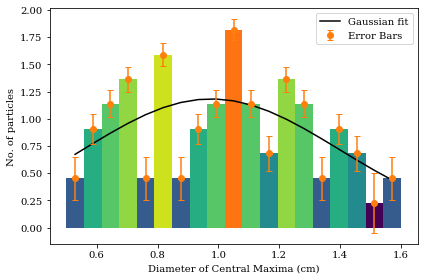

Standard Deviation = 0.2775342495896513


In [ ]:
# Creating histogram
#D = np.loadtxt("../content/Diffraction.csv", delimiter=",", unpack=True, skiprows=1, usecols=(5)) # in m
D = np.array([0.9333333333,0.8,0.5,0.5666666667,0.8333333333,0.9333333333,0.9333333333,0.6333333333,1,1.033333333,1.433333333,1.266666667,1.133333333,0.9666666667,1.033333333,1.233333333,0.8666666667,0.7,0.5,1.066666667,0.8333333333,0.6333333333,1.1,0.7,0.7666666667,0.7333333333,0.9666666667,1.166666667,1.366666667,0.6333333333,1.2,1.166666667,0.8,1.5,1.1,1.033333333,1.066666667,1.566666667,1.3,0.6,1.466666667,1.4,1.233333333,1.6,1.366666667,1.266666667,1.233333333,1.4,1.166666667,1.266666667,1.333333333,1.433333333,1.266666667,0.8333333333,0.9666666667,1.066666667,0.8333333333,0.6,1.133333333,1.066666667,1.233333333,1.1,1.066666667,0.8333333333,0.6666666667,0.7333333333,0.9333333333,1.333333333,0.7666666667,0.6666666667,0.7333333333,0.9666666667,0.8666666667,0.7333333333,0.5666666667,1.2])
d = np.round(D, decimals=2)
print(len(d))
fig, axs = plt.subplots(1, 1, tight_layout = True)
N, bins, patches = axs.hist(d, bins = 19, density=True) #density=True normalises the histogram

mean = np.mean(d)
std = np.std(d)

# Divide the data into bins and calculate the count or frequency of each bin
counts, _ = np.histogram(d, bins=bins)

# Calculate the standard error of the mean (SEM) for each bin
sem = std / np.sqrt(counts)

# Find the bin with the maximum frequency
bin_index = np.argmax(N)

# Find the bin edges and width
bin_edges = bins[bin_index:bin_index+2]
bin_width = bin_edges[1] - bin_edges[0]

# Compute the center of the bin with the maximum frequency
bin_center = bin_edges.mean()

# Print the center and frequency of the bin with the maximum frequency
print("Bin with maximum frequency: center={}, frequency={}".format(bin_center, N[bin_index]))

# Plot the histogram with the bin with maximum frequency highlighted
plt.bar(bin_center, N[bin_index], width=bin_width, color='r', alpha=0.5)


# Setting color
fracs = ((N**(1/5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max()) 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color) 

#Gaussian fit

bin_centers = (bins[1:] + bins[:-1]) / 2

# Define the Gaussian function
def gauss(x, a, mu, sigma):
    return a * stats.norm.pdf(x, loc=mu, scale=sigma)

# Fit the Gaussian function to the histogram
p0 = [1, np.mean(d), np.std(d)]
popt, pcov = curve_fit(gauss, bin_centers, N, p0=p0)

# Plot the histogram and the fitted Gaussian curve
plt.plot(bin_centers, gauss(bin_centers, *popt), 'k-', label='Gaussian fit')
plt.errorbar(bin_centers, N, yerr=sem, fmt='o', capsize=3, label='Error Bars')
plt.legend()

plt.xlabel('Diameter of Central Maxima (cm)')
plt.ylabel('No. of particles')
plt.show()

print('Standard Deviation =',np.std(d))

In [ ]:
p = (bin_center)/2 #radius of the central maxima as found from the gaussian curve in cm 
b = 280.8 #distance of the screen from the glass slide in cm
l = 650e-9 # wavelength of laser source

tantheta = p/b
theta = math.atan(tantheta) #math.degrees(math.atan(tantheta))
sintheta = math.sin(theta)
a = 1.22*l/sintheta # diameter of particle of carrom powder
print("The diameter of a particle of carrom powder is {:.2e}".format(a), "m")
print("The diameter of a particle of carrom powder is ",a, "m")
print(p/100)

The diameter of a particle of carrom powder is 4.24e-04 m
The diameter of a particle of carrom powder is  0.00042414245560451084 m
0.00525


PART B: SURFACE TENSION OF WATER

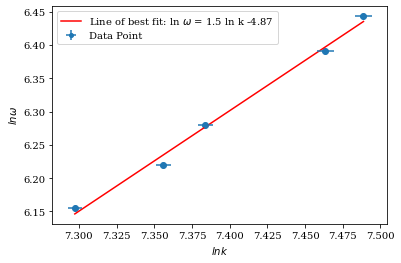

Slope: 1.509449369658039
Slope error: 0.033011223237793846
Intercept: -4.86858340054153
Intercept error: 0.24422358360656096
st = 0.059047591649865935
18.834925567194585
0.18400000000000005 3.154
LinregressResult(slope=1.509449369658039, intercept=-4.86858340054153, rvalue=0.9964320542780661, pvalue=0.0002556987757156784, stderr=0.07381533918012775, intercept_stderr=0.5461005346528737)
x1= [0.0085  0.009   0.00925 0.01    0.01025]
gamma= [0.00261937 0.00277731 0.00285628 0.00309318 0.00317215]
k= [1476.29545253 1565.31062353 1609.81754959 1743.3356801  1787.84083829]


In [ ]:
L = (167.6 + 135.1 + 12.7)/100 #m
H = (94.7-76.3)/100  #height of the central maxima - height of the water level  #m

# w_ = 2*np.pi*np.array([70,75,80,85,90,95,100,105]) #frequency in Hz
# x1_ = np.array([1.65, 1.7, 1.8, 1.85, 1.85,2, 2.05, 2 ])/200  #distance between centre of central maxima and first maxima in cm

w_ = 2*np.pi*np.array([75,80,85,95,100]) #frequency in Hz
x1_ = np.array([1.7, 1.8, 1.85,2, 2.05])/200  #distance between centre of central maxima and first maxima in m

theta = H/L
gamma = np.arctan((H+x1_)/L) - theta
k = 2*np.pi*np.sin(theta)*np.sin(gamma)/(650e-9)
w_err = [0.1/a for a in w_]
# k_err = [a*np.sqrt((0.001/a)**2 + (0.1/H)**2 + (0.1/L)**2) for a in x1_]
k_err = x1_*np.sqrt((0.001/x1_)**2 + (0.1/H)**2 + (0.1/L)**2)

m,c = np.polyfit(np.log(k), np.log(w_), 1)
plt.scatter(np.log(k),np.log(w_))
plt.plot(np.log(k), m*np.log(k) + c, 'r', label = 'Line of best fit: ln $'r'\omega$ = 1.5 ln k -4.87')
plt.xlabel('$'r'ln k$')
plt.ylabel('$'r'ln \omega$')
plt.errorbar(np.log(k),np.log(w_), yerr=w_err, xerr=k_err, fmt='o', label = 'Data Point', markersize = 4)
plt.legend()
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(np.log(k),np.log(w_))
slope_error = std_err / np.sqrt(len(np.log(k)))
#intercept_error = slope_error * np.sqrt(np.mean(np.log(k)**2))
print(f"Slope: {slope}")
print(f"Slope error: {slope_error}")
print(f"Intercept: {intercept}")
print(f"Intercept error: {intercept_error}")
st = 1000*np.exp(2*c)
print('st =', st)
print(abs(0.07275-st)*100/0.07275)
print(H,L)
print(linregress(np.log(k),np.log(w_)))
print('x1=', x1_)
print('gamma=', gamma)
print('k=', k)

USELESS DATA

theta= 0.05858236862704309
gamma= [0.2512969461376896, 0.2584689125568579, 0.272711569400296, 0.27978130458987377, 0.3007787912181737, 0.3077060019001459]
[140731.58902757 144659.48373111 152437.54994195 156287.02164787
 167673.35977995 171413.81683971]


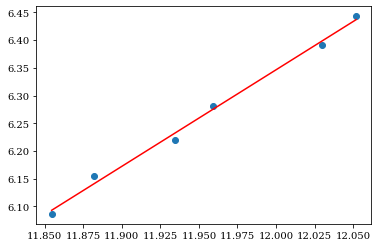

1.7433202833883885 -14.573427485697001
surface tension= 2.1962497298819578e-10
percentage error= 99.99999969811002 %
x1= [0.825 0.85  0.9   0.925 1.    1.025]
gamma= [0.2512969461376896, 0.2584689125568579, 0.272711569400296, 0.27978130458987377, 0.3007787912181737, 0.3077060019001459]
k= [140731.58902757 144659.48373111 152437.54994195 156287.02164787
 167673.35977995 171413.81683971]


In [ ]:
#TRIAL 1

#H = 10 #height of the center of the pattern from the water plate
#L = 174.7 + 135.1 + 6.7  #distance from the water plate to the screen #cm 

L_ = (167.6 + 135.1 + np.mean([12.7,12.7,12.8]))/100 #cm
H_ = (94.7 -76.2)/100 #height of the water level(76.2) + height of the central maxima #cm

#w = np.array([70,75,80,85,90,95,100,105]) #frequency in Hz
#x1 = np.array([1.65, 1.7, 1.8, 1.85, 1.85,2, 2.05, 2 ])/200  #distance between centre of central maxima and first maxima in cm

w = 2*np.pi*np.array([70,75,80,85,95,100]) #frequency in Hz
x1 = np.array([1.65, 1.7, 1.8, 1.85,2, 2.05])/2  #distance between centre of central maxima and first maxima in cm

#theta = math.degrees(math.atan(H_/L_)) 
#gamma = [math.degrees(math.atan((H_+ i)/L_)) - theta for i in x1]

theta = math.atan(H_/L_)
gamma = [math.atan((H_+ i)/L_) - theta for i in x1]
print('theta=', theta)
print('gamma=', gamma)

k = 2*np.pi*np.sin(gamma)*np.sin(theta)/650e-9
print(k)
W = np.log(w)
m,c = np.polyfit(np.log(k), W, 1)
W2 = [m*i + c for i in np.log(k)]
s =1000*np.exp(2*c)
plt.scatter(np.log(k),W)
plt.plot(np.log(k),W2, 'r')
plt.show()
print(m,c)
print('surface tension=',s)
print('percentage error=' , 100*(0.07275 -s)/0.07275, '%')


theta= 0.0603573286475183
gamma= [0.0027218444522086396, 0.0030420007096371646, 0.0032020739622366026, 0.0033621439532873706, 0.0035222106746866724]
k= [1587.06811468 1773.74605016 1867.08210774 1960.41621572 2053.748367  ]


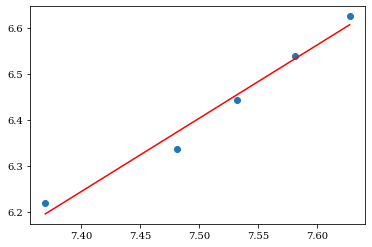

1.5934775609312142 -5.547197057005865
surface tension= 0.015197279688178045
percentage error= 79.11026846985835 %


In [ ]:
#TRIAL 2

L_ = (306.5+11.1-6.5)/100  #m
H_ = (95- 76.2)/100 #height of the water level(76.2) + height of the central maxima #m

w = 2*np.pi*np.array([80,90,100,110,120]) #frequency in Hz
x1 = np.array([1.7, 1.9, 2, 2.1, 2.2])/200  #distance between centre of central maxima and first maxima in m

#theta = math.degrees(math.atan(H_/L_)) 
#gamma = [math.degrees(math.atan((H_+ i)/L_)) - theta for i in x1]

theta = math.atan(H_/L_)
gamma = [math.atan((H_+ i)/L_) - theta for i in x1]
print('theta=', theta)
print('gamma=', gamma)

k = 2*np.pi*np.sin(gamma)*np.sin(theta)/650e-9
print('k=', k)
W = np.log(w)
m,c = np.polyfit(np.log(k), W, 1)
W2 = [m*i + c for i in np.log(k)]
s =1000*np.exp(2*c)
plt.scatter(np.log(k),W)
plt.plot(np.log(k),W2, 'r')
plt.show()
print(m,c)
print('surface tension=',s)
print('percentage error=' , 100*(0.07275 -s)/0.07275, '%')

expected value of surface tension = 0.072

TEST AREA